In [370]:
# Importing the nessecary modules
import numpy as np
from scipy import stats
import scipy.stats as si
import matplotlib.pyplot as plt
import seaborn as sns
import math

import pandas as pd
import warnings
warnings.filterwarnings("ignore")



In [371]:
# Parameters
V = 130
D = 100
r = 0.01
sigma = 0.25
T = 1
q = 0
λ = 0.2
k = np.log(0.8)
γ = np.log(0.8)
δ = 0.4
Ds = 50
Dj = 50

In [372]:
# Lambda functions

# Normal CDF
N = lambda x: stats.norm.cdf(x)

# Posisson PMF
P = lambda x, k: stats.poisson.pmf(x, k)

# Yield spreads (bps)
s = lambda Model: 10000 * (np.log(D/Model) / tau - r)




### Spørgsmål 1 - værdi af egenkapital og obligationer som en funktion at virksomhedens værdi

In [373]:
df = pd.DataFrame(data=range(0, 201, 1), columns=['V'])

def bs_call(v, D, T):

    d1 = (np.log(v / D) + (0.5 * sigma ** 2) * T + r*T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    return (v * N(d1) - D * np.exp(-r * T) * N(d2))



In [374]:
df['S'] = round(bs_call(df['V'], Ds+Dj, T),2)


df['Bs'] = round(df['V']- bs_call(df['V'], Ds, T),2)

#
df['Bj'] = round(bs_call(df['V'], Ds, T) - bs_call(df['V'], Ds+Dj, T),2)


df['C'] = round(df['S']+ df['Bs']+ df['Bj'],0) # Check value

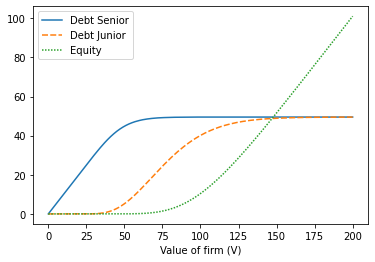

In [375]:
sns.lineplot(data=[df['Bs'],df['Bj'],df['S']])
plt.legend(['Debt Senior','Debt Junior','Equity'], loc='upper left')
plt.xlabel('Value of firm (V)')
plt.ylabel('')
plt.show()

##### Beskrivelse af plot


### Spørgsmål 2 - Vis kreditspænd for hhv junior og senior gæld når virksomheden er $V=180$ og $V=90$

In [376]:

# Time to maturity
dt = 1/1000
T=10
tau = np.arange(dt, T+dt, dt)

# Coordinates for plotting
x = tau

V = 180
D= 50

In [377]:
y_junior_low = s(bs_call((V-90),Ds, tau)-bs_call((V-90),Ds+Dj, tau))

y_junior_high = s(bs_call(V,Ds, tau)-bs_call(V,Ds+Dj, tau))

y_senior_low = s((V-90)-bs_call((V-90),Ds, tau))

y_senior_high = s(V-bs_call(V,Ds, tau))

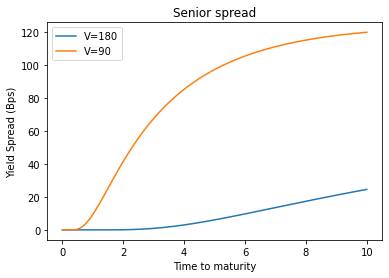

In [378]:

sns.lineplot(x=x, y=y_senior_high, label='V=180')
sns.lineplot(x=x, y=y_senior_low, label='V=90')
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(0, 200)
plt.show()

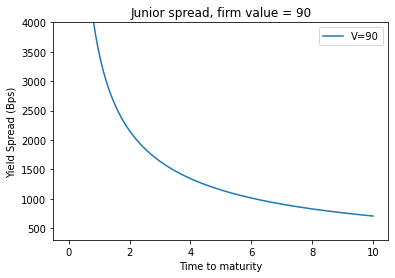

In [379]:
sns.lineplot(x=x, y=y_junior_low, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 90')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(300, 4000)
plt.show()


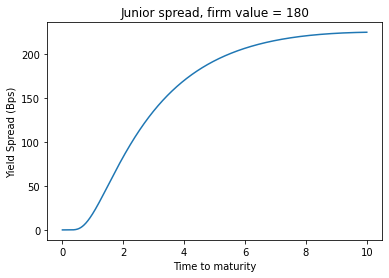

In [380]:
plt.plot(x, y_junior_high)
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 180')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(y_junior_high.max()-20, y_junior_high.max()+20)
plt.show()


### Spørgsmål 3 - Merton Model med spring

In [381]:
def BS_call(V, T, D, sigma, r):
    d1 = np.log(V / D) + (r + 0.5 * sigma**2) * T
    d1 /= (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    price = V * N(d1) - D * np.exp(-r * T) * N(d2)
    return price

def merton_call_jump(V, T, D, N):
    price = 0.0
    lam_b = λ * (1.0 + k) # intensity
    for n in range(N):
        sig_n = np.sqrt(sigma**2 + n * δ**2 / T)
        r_n = r - λ * k + n * np.log(1+k) / T
        prob_n = (lam_b * T) ** n / math.factorial(n) * np.exp(-lam_b * T)
        price += BS_call(V, T, D, sig_n, r_n) * prob_n
    return price


In [382]:
df2 = pd.DataFrame(data=range(0, 201, 1), columns=['V'])

df2['S'] = round(merton_call_jump(df2['V'], 1, Ds+Dj, 4),2)


df2['Bs'] = round(df2['V']- merton_call_jump(df2['V'], 1, Ds, 4),2)

#
df2['Bj'] = round(merton_call_jump(df2['V'], 1, Ds, 4) - merton_call_jump(df2['V'], 1, Ds+Dj, 4),2)


df2['C'] = round(df2['S']+ df2['Bs']+ df2['Bj'],0) # Check value

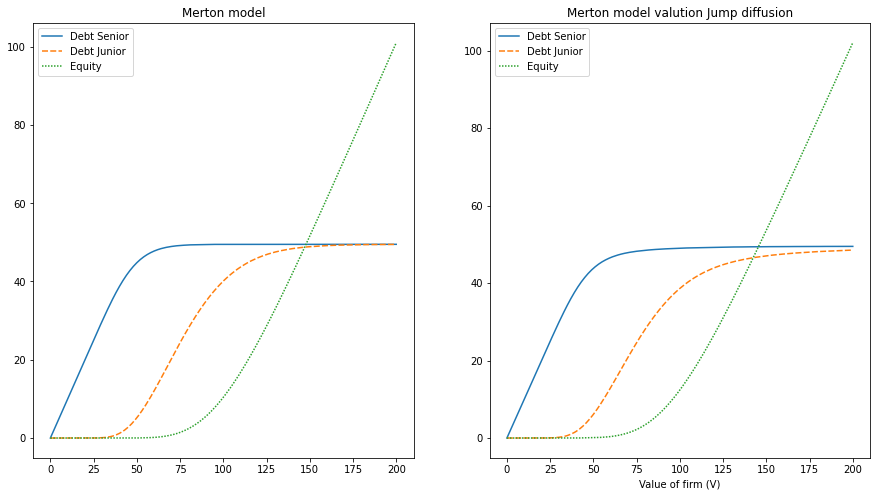

In [396]:
fig, ax =plt.subplots(1,2,figsize=(15,8))

sns.lineplot(data=[df2['Bs'],df2['Bj'],df2['S']], ax=ax[1])
sns.lineplot(data=[df['Bs'],df['Bj'],df['S']], ax=ax[0])
plt.legend(['Debt Senior','Debt Junior','Equity'], loc='upper left')
ax[1].set_title('Merton model valution Jump diffusion')
ax[0].set_title('Merton model')
ax[0].legend(['Debt Senior','Debt Junior','Equity'], loc='upper left')
plt.xlabel('Value of firm (V)')
plt.ylabel('')
plt.show()


# Time to maturity
dt = 1/1000
# T=10
tau = np.arange(dt, T+dt, dt)

# Coordinates for plotting
x = tau


In [384]:
V = 180
D= 50
y_junior_low_jump = s(merton_call_jump((V-90), tau, Ds, 4)-merton_call_jump((V-90), tau, Ds+Dj, 4))

y_junior_high_jump = s(merton_call_jump(V, tau, Ds, 4)-merton_call_jump(V, tau, Ds+Dj, 4))

y_senior_low_jump = s((V-90)-merton_call_jump((V-90), tau, Ds, 4))

y_senior_high_jump = s(V-merton_call_jump(V, tau, Ds, 4))

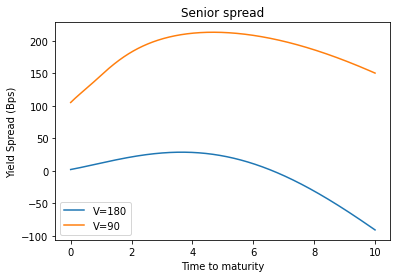

In [385]:

sns.lineplot(x=x, y=y_senior_high_jump, label='V=180')
sns.lineplot(x=x, y=y_senior_low_jump, label='V=90')
plt.title('Senior spread')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(0, 200)
plt.show()

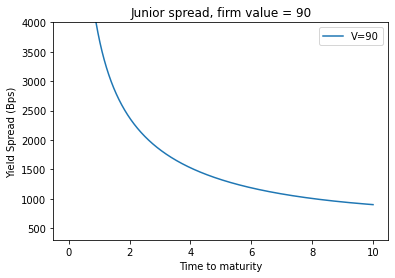

In [386]:
sns.lineplot(x=x, y=y_junior_low_jump, label='V=90')
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 90')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
plt.ylim(300, 4000)
plt.show()


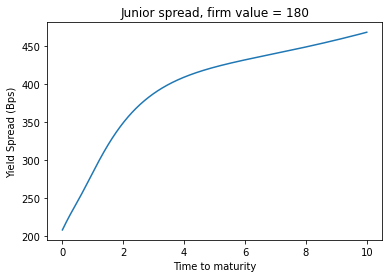

In [387]:
plt.plot(x, y_junior_high_jump)
# plt.plot(x, y_junior_low)
plt.title('Junior spread, firm value = 180')
plt.ylabel('Yield Spread (Bps)')
plt.xlabel('Time to maturity')
# plt.ylim(y_junior_high.max()-20, y_junior_high.max()+20)
plt.show()


### Spørgsmål 4 - Spring diffusions parametrene



##### Ændring i spring parameter med fra $\gamma$ fra $log(0.9)$ til $log(0.5)$

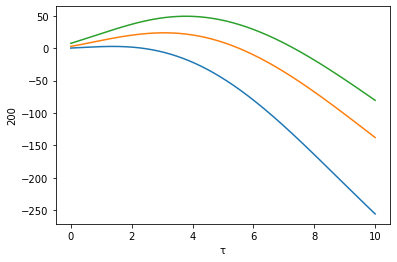

<AxesSubplot:xlabel='τ', ylabel='200'>

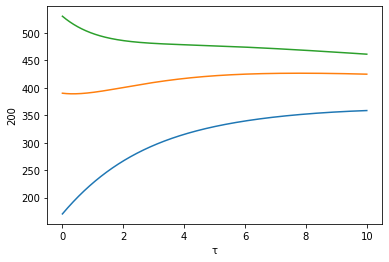

In [388]:
# df3['Time to maturity'] = np.arange(dt, T+dt, dt)

df3 = pd.DataFrame(data=np.arange(dt, T+dt, dt), columns=['τ'])
D= 50
k = np.log(0.9)
# Senior debt
df3['200'] = s(200 - merton_call_jump(200, tau, D, 4))
df3['150'] = s(150 - merton_call_jump(150, tau, D, 4))
df3['130'] = s(130 - merton_call_jump(130, tau, D, 4))

df4 = pd.DataFrame(data=np.arange(dt, T+dt, dt), columns=['τ'])
D= 50
k = np.log(0.5)
# Senior debt
df4['200'] = s(200 - merton_call_jump(200, tau, D, 4))
df4['150'] = s(150 - merton_call_jump(150, tau, D, 4))
df4['130'] = s(130 - merton_call_jump(130, tau, D, 4))

import seaborn as sns
#
# sns.lineplot(x=df3['τ'], y=[df3['200'],df3['150'],df3['130']])

sns.lineplot(x=df3['τ'], y=df3['200'])
sns.lineplot(x=df3['τ'], y=df3['150'])
sns.lineplot(x=df3['τ'], y=df3['130'])

plt.show()
plt.clf()
sns.lineplot(x=df4['τ'], y=df4['200'])
sns.lineplot(x=df4['τ'], y=df4['150'])
sns.lineplot(x=df4['τ'], y=df4['130'])

##### Ændring i spring parameter med fra $\gamma$ fra $log(0.9)$ til $log(0.5)$